In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.lines as mlines


# Data Import and Small Cleaning

In [3]:
round1_table = pd.read_csv('AdaptyvBio Round1 Expression - Sequences and Expression.csv')
round1_table['EXPRESSION'] = round1_table['EXPRESSION'].replace('high', 'High')
round1_table

,#,USER,DESIGN NAME,EXPRESSION,EXPRESSION #,SEQUENCE,BINDING?,REPLICATES,Kd - Mean,Kon - Mean,Koff - Mean,plddt,pae_interaction,model_names,methods
0,0,NaN,Cetuximab_scFv,Low,1,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLE...,TRUE,2,6.64E-09,9.48E+05,4.42E-03,NaN,NaN,NaN,NaN
1,1,ahmedsameh,ahmedsameh-Q3,Medium,2,WVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQRE...,TRUE,2,3.69E-08,1.08E+05,3.76E-03,77.840455,28.217942,"[""Rosetta""]","[""Physics Based""]"
2,2,ahmedsameh,ahmedsameh-yy2,Medium,2,QVQLQESGGGLVQPGGSLRLSCAASGRTFSSHAMGWFRQAPGKQRE...,TRUE,2,6.28E-08,1.09E+05,6.83E-03,77.288939,28.177070,"[""Rosetta""]","[""Physics Based""]"
3,3,martin.pacesa+lennart.nickel,martin.pacesa-EGFR_l138_s90285_mpnn2,High,3,SPFDLFLDRLPEQDPEMTEEGKWWAEEMKRMVGPHFEELEEYIRNN...,TRUE,3,4.91E-07,1.86E+04,9.08E-03,88.653551,16.878782,"[""AF2 Backprop""]","[""Hallucination""]"
4,4,x.rustamov,x.rustamov-m_18_41,High,3,SAGQAQIEEVKARADKAKTLEELKELRKEAYEKNWKAYMAVVDETE...,TRUE,2,4.77E-06,--,--,89.580600,14.921833,"[""AF2 Backprop""]","[""Hallucination""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,197,ahmedsameh,ahmedsameh-y6,NaN,0,QVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQRE...,Unknown,3,--,--,--,74.065691,28.327152,"[""Custom (Generative)""]","[""De Novo""]"
198,198,ahmedsameh,ahmedsameh-s3,Low,1,QVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQRE...,FALSE,2,--,--,--,77.784242,28.178994,"[""Rosetta""]","[""Physics Based""]"
199,199,akshaychenna,akshayc-10_run_3_1002_dldesign_0_cycle1_af2pred,NaN,0,GTSESLAKLQFIKDLAAALAPLDKKREEAEKKLYEEIKKLVPEGAE...,Unknown,3,--,--,--,77.753258,28.208359,"[""Rosetta""]","[""Physics Based""]"
200,200,NaN,akshayc-9_run_3_1002_dldesign_0_cycle1_af2pred,Low,1,GISESLAMLEFLKKLAEALAPLTKIEEEAEKELKEKIKELVPEGSE...,FALSE,3,NaN,NaN,NaN,77.456894,28.246956,"[""Rosetta""]","[""Physics Based""]"


# Main Plot: PLDDT vs iPAE colored by Expression Rate. Binders Highlighted

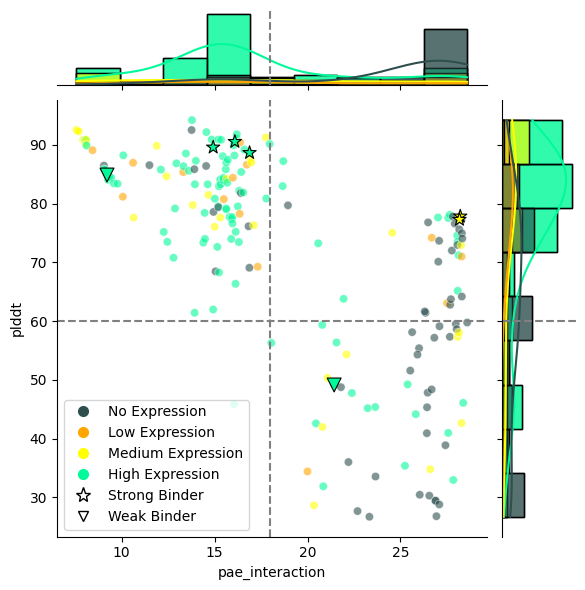

In [5]:
custom_palette = {0:'darkslategrey',1:'orange',2:'yellow',3:'mediumspringgreen'}
g = sns.JointGrid(data=round1_table, x="pae_interaction", y="plddt", hue="EXPRESSION #", palette=custom_palette)
g.plot(sns.scatterplot, sns.histplot, alpha=.6)
g.plot_marginals(sns.histplot, kde=True)
g.refline(x=18, y=60)
true_mask = round1_table[(round1_table['BINDING?'] == 'TRUE')]
sns.scatterplot(data= true_mask, x='pae_interaction', y='plddt', s=100, hue="EXPRESSION #", palette=custom_palette, marker='*', edgecolor='black', ax=g.ax_joint)
weak_mask = round1_table[(round1_table['BINDING?'] == 'Weak')]
sns.scatterplot(data= weak_mask, x='pae_interaction', y='plddt', s=100,hue="EXPRESSION #", palette=custom_palette, marker='v',edgecolor='black', ax=g.ax_joint)


none = mlines.Line2D([], [], color='darkslategrey', marker='o', linestyle='None', markersize=7, label='No Expression')
low = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=7, label='Low Expression')
medium = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None', markersize=7, label='Medium Expression')
high = mlines.Line2D([], [], color='mediumspringgreen', marker='o', linestyle='None', markersize=7, label='High Expression')
strong_binder = mlines.Line2D([], [], color='white', marker='*', linestyle='solid', markeredgecolor='black', markersize=11, label='Strong Binder')
weak_binder = mlines.Line2D([], [], color='white', marker='v', linestyle='solid', markeredgecolor='black', markersize=7, label='Weak Binder')

g.ax_joint.legend(handles=[none, low, medium, high, strong_binder, weak_binder], loc='lower left')
#g.savefig("iPAE-expression.png", dpi=600)

# Ridge Plot of Expression Rates across iPAE

/Users/agoldberg/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/agoldberg/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/agoldberg/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/agoldberg/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.ti

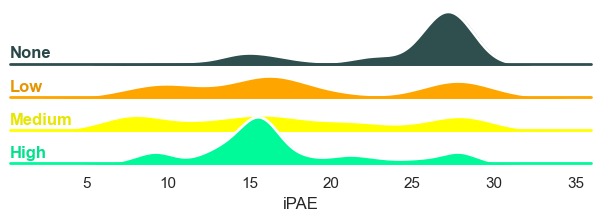

In [5]:
from matplotlib.colors import to_rgba, rgb_to_hsv, hsv_to_rgb

custom_palette = {0:'darkslategrey',1:'orange',2:'yellow',3:'mediumspringgreen'}

sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
i = np.tile(['None Expression','Low Expression', 'Medium Expression', 'High Expression'], 50)
i = sns.FacetGrid(round1_table, row="EXPRESSION #", hue="EXPRESSION #", aspect=15, height=.5, palette=custom_palette)

i.map(sns.kdeplot, "pae_interaction",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
i.map(sns.kdeplot, "pae_interaction", clip_on=False, color="w", lw=2, bw_adjust=.5)

i.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


#desaturate label color
def desaturate_color(color, amount=0.8):
    rgba = to_rgba(color)  # Convert to RGBA
    hsv = rgb_to_hsv(rgba[:3])  # Convert RGB to HSV
    hsv[2] *= amount # Desaturate
    return hsv_to_rgb(hsv)
# Define labels mapping for 'EXPRESSION #' values
expression_labels = {0: 'None', 1: 'Low', 2: 'Medium', 3: 'High'}
def label(x, color, label):
    ax = plt.gca()
    expression_label = expression_labels[int(label)]
    de_color = desaturate_color(color, .9)
    ax.text(0, .2, expression_label, fontweight="bold", color=de_color,
            ha="left", va="center", transform=ax.transAxes)


i.map(label, "pae_interaction")

i.figure.subplots_adjust(hspace=-.4)

i.set_titles("")
i.set(yticks=[], ylabel="")
i.despine(bottom=True, left=True)

i.set_xlabels("iPAE")
# i.savefig('iPAE-expression-RIDGEPLOT.png', dpi=600)

# Percentage Expression in 4 Bins of iPAE

/var/folders/7w/70y6pkln3dncwz0_q9mnz52h0000gq/T/ipykernel_15766/1778518871.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_df = round1_table.groupby(['pae_bins', 'EXPRESSION #']).size().reset_index(name='count')
/var/folders/7w/70y6pkln3dncwz0_q9mnz52h0000gq/T/ipykernel_15766/1778518871.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_bin = round1_table.groupby('pae_bins').size().reset_index(name='total')


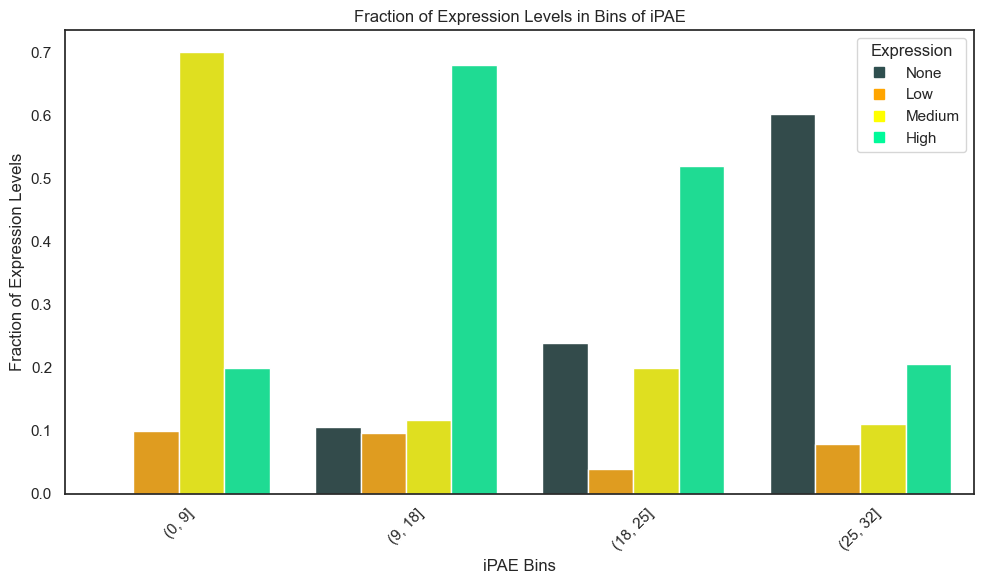

In [201]:
round1_table['pae_bins'] = pd.cut(round1_table['pae_interaction'], bins=(0,9,18,25,32))

percentage_df = round1_table.groupby(['pae_bins', 'EXPRESSION #']).size().reset_index(name='count')
total_per_bin = round1_table.groupby('pae_bins').size().reset_index(name='total')
percentage_df = pd.merge(percentage_df, total_per_bin, on='pae_bins')
percentage_df['percentage'] = (percentage_df['count'] / percentage_df['total']) 

plt.figure(figsize=(10, 6))
sns.barplot(data=percentage_df, x='pae_bins', y='percentage', hue='EXPRESSION #', palette=custom_palette)

plt.xticks(rotation=45)
plt.xlabel('iPAE Bins')
plt.ylabel('Fraction of Expression Levels')
plt.title('Fraction of Expression Levels in Bins of iPAE')
none = mlines.Line2D([], [], color='darkslategrey', marker='s', linestyle='None', markersize=7, label='None')
low = mlines.Line2D([], [], color='orange', marker='s', linestyle='None', markersize=7, label='Low')
medium = mlines.Line2D([], [], color='yellow', marker='s', linestyle='None', markersize=7, label='Medium')
high = mlines.Line2D([], [], color='mediumspringgreen', marker='s', linestyle='None', markersize=7, label='High')
plt.legend(handles=[none, low, medium, high], title='Expression', facecolor='white')

plt.tight_layout()
# plt.savefig('iPAE-expressionPERCENT_BARPLOT.png', dpi=600)

# ESM Log Likelihood Function

In [ ]:
import numpy as np
from transformers import EsmForMaskedLM, EsmTokenizer
import torch

def calc_LL_ESM2(seq_array):
    # Load the base model and tokenizer
    #33-layer 650M parameter version of ESM2
    base_model_path = "facebook/esm2_t33_650M_UR50D"
    model = EsmForMaskedLM.from_pretrained(base_model_path)
    tokenizer = EsmTokenizer.from_pretrained(base_model_path)
    model.eval()
    inputs = tokenizer(seq_array, return_tensors="pt")
    i = 1
    #forward pass for logits
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

        # Convert logits to log-probabilities
        log_probs = torch.log_softmax(logits, dim=-1)

        # Get the token ids for the original sequence (correct tokens)
        input_ids = inputs["input_ids"]

        # Gather the log probabilities for the actual tokens at each position
        token_log_probs = log_probs.gather(2, input_ids.unsqueeze(-1)).squeeze(-1)

        # Sum the log probabilities to get the log likelihood
        log_likelihood = token_log_probs.sum()

        #print(f"#{i} Log likelihood: {log_likelihood.item():.3f}")
        return log_likelihood.item()

# Apply Sequence Length and Log-Likelihood Functions

In [11]:
round1_table['Seq_Length'] = round1_table['SEQUENCE'].apply(len)
round1_table['Log-Likelihood'] = round1_table['SEQUENCE'].apply(calc_LL_ESM2)
round1_table['LL-Normalized'] = round1_table['Log-Likelihood']/round1_table['Seq_Length']
round1_table

,#,USER,DESIGN NAME,EXPRESSION,EXPRESSION #,SEQUENCE,BINDING?,REPLICATES,Kd - Mean,Kon - Mean,Koff - Mean,plddt,pae_interaction,model_names,methods,Seq_Length,Log-Likelihood,LL-Normalized
0,0,NaN,Cetuximab_scFv,Low,1,QVQLKQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLE...,TRUE,2,6.64E-09,9.48E+05,4.42E-03,NaN,NaN,NaN,NaN,241,-51.351974,-0.213079
1,1,ahmedsameh,ahmedsameh-Q3,Medium,2,WVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQRE...,TRUE,2,3.69E-08,1.08E+05,3.76E-03,77.840455,28.217942,"[""Rosetta""]","[""Physics Based""]",132,-46.615593,-0.353148
2,2,ahmedsameh,ahmedsameh-yy2,Medium,2,QVQLQESGGGLVQPGGSLRLSCAASGRTFSSHAMGWFRQAPGKQRE...,TRUE,2,6.28E-08,1.09E+05,6.83E-03,77.288939,28.177070,"[""Rosetta""]","[""Physics Based""]",132,-40.773296,-0.308889
3,3,martin.pacesa+lennart.nickel,martin.pacesa-EGFR_l138_s90285_mpnn2,High,3,SPFDLFLDRLPEQDPEMTEEGKWWAEEMKRMVGPHFEELEEYIRNN...,TRUE,3,4.91E-07,1.86E+04,9.08E-03,88.653551,16.878782,"[""AF2 Backprop""]","[""Hallucination""]",138,-59.819443,-0.433474
4,4,x.rustamov,x.rustamov-m_18_41,High,3,SAGQAQIEEVKARADKAKTLEELKELRKEAYEKNWKAYMAVVDETE...,TRUE,2,4.77E-06,--,--,89.580600,14.921833,"[""AF2 Backprop""]","[""Hallucination""]",100,-36.436508,-0.364365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,197,ahmedsameh,ahmedsameh-y6,NaN,0,QVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQRE...,Unknown,3,--,--,--,74.065691,28.327152,"[""Custom (Generative)""]","[""De Novo""]",132,-41.301838,-0.312893
198,198,ahmedsameh,ahmedsameh-s3,Low,1,QVQLQESGGGLVQPGGSLRLSCAASGRTFSSYAMGWFRQAPGKQRE...,FALSE,2,--,--,--,77.784242,28.178994,"[""Rosetta""]","[""Physics Based""]",132,-42.076260,-0.318760
199,199,akshaychenna,akshayc-10_run_3_1002_dldesign_0_cycle1_af2pred,NaN,0,GTSESLAKLQFIKDLAAALAPLDKKREEAEKKLYEEIKKLVPEGAE...,Unknown,3,--,--,--,77.753258,28.208359,"[""Rosetta""]","[""Physics Based""]",130,-38.615940,-0.297046
200,200,NaN,akshayc-9_run_3_1002_dldesign_0_cycle1_af2pred,Low,1,GISESLAMLEFLKKLAEALAPLTKIEEEAEKELKEKIKELVPEGSE...,FALSE,3,NaN,NaN,NaN,77.456894,28.246956,"[""Rosetta""]","[""Physics Based""]",130,-47.966431,-0.368973


# Log-Likelihood vs iPAE

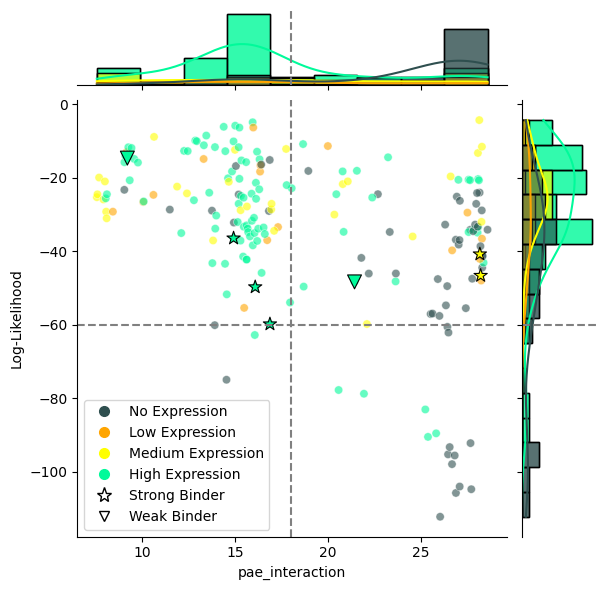

In [25]:
custom_palette = {0:'darkslategrey',1:'orange',2:'yellow',3:'mediumspringgreen'}
g = sns.JointGrid(data=round1_table, x="pae_interaction", y="Log-Likelihood", hue="EXPRESSION #", palette=custom_palette)
g.plot(sns.scatterplot, sns.histplot, alpha=.6)
g.plot_marginals(sns.histplot, kde=True)
g.refline(x=18, y=-60)
true_mask = round1_table[(round1_table['BINDING?'] == 'TRUE')]
sns.scatterplot(data= true_mask, x='pae_interaction', y='Log-Likelihood', s=100, hue="EXPRESSION #", palette=custom_palette, marker='*', edgecolor='black', ax=g.ax_joint)
weak_mask = round1_table[(round1_table['BINDING?'] == 'Weak')]
sns.scatterplot(data= weak_mask, x='pae_interaction', y='Log-Likelihood', s=100,hue="EXPRESSION #", palette=custom_palette, marker='v',edgecolor='black', ax=g.ax_joint)


none = mlines.Line2D([], [], color='darkslategrey', marker='o', linestyle='None', markersize=7, label='No Expression')
low = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=7, label='Low Expression')
medium = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None', markersize=7, label='Medium Expression')
high = mlines.Line2D([], [], color='mediumspringgreen', marker='o', linestyle='None', markersize=7, label='High Expression')
strong_binder = mlines.Line2D([], [], color='white', marker='*', linestyle='solid', markeredgecolor='black', markersize=11, label='Strong Binder')
weak_binder = mlines.Line2D([], [], color='white', marker='v', linestyle='solid', markeredgecolor='black', markersize=7, label='Weak Binder')

g.ax_joint.legend(handles=[none, low, medium, high, strong_binder, weak_binder], loc='lower left')
# g.savefig("iPAE-LOGLIK-expression.png", dpi=600)

# Same Plot Masked for >= 100 in Sequence Length

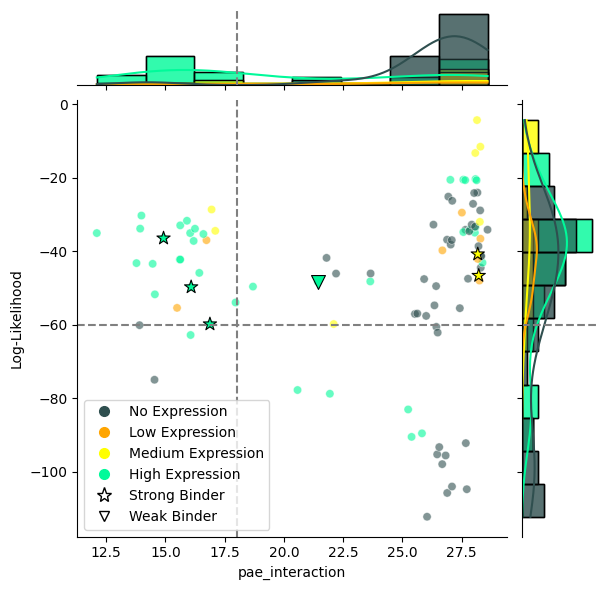

In [24]:
seq_length_mask = round1_table[round1_table['Seq_Length'] >= 100]

custom_palette = {0:'darkslategrey',1:'orange',2:'yellow',3:'mediumspringgreen'}
g = sns.JointGrid(data=seq_length_mask, x="pae_interaction", y="Log-Likelihood", hue="EXPRESSION #", palette=custom_palette)
g.plot(sns.scatterplot, sns.histplot, alpha=.6)
g.plot_marginals(sns.histplot, kde=True)
g.refline(x=18, y=-60)
true_mask = seq_length_mask[(seq_length_mask['BINDING?'] == 'TRUE')]
sns.scatterplot(data= true_mask, x='pae_interaction', y='Log-Likelihood', s=100, hue="EXPRESSION #", palette=custom_palette, marker='*', edgecolor='black', ax=g.ax_joint)
weak_mask = seq_length_mask[(seq_length_mask['BINDING?'] == 'Weak')]
sns.scatterplot(data= weak_mask, x='pae_interaction', y='Log-Likelihood', s=100,hue="EXPRESSION #", palette=custom_palette, marker='v',edgecolor='black', ax=g.ax_joint)


none = mlines.Line2D([], [], color='darkslategrey', marker='o', linestyle='None', markersize=7, label='No Expression')
low = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=7, label='Low Expression')
medium = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None', markersize=7, label='Medium Expression')
high = mlines.Line2D([], [], color='mediumspringgreen', marker='o', linestyle='None', markersize=7, label='High Expression')
strong_binder = mlines.Line2D([], [], color='white', marker='*', linestyle='solid', markeredgecolor='black', markersize=11, label='Strong Binder')
weak_binder = mlines.Line2D([], [], color='white', marker='v', linestyle='solid', markeredgecolor='black', markersize=7, label='Weak Binder')

g.ax_joint.legend(handles=[none, low, medium, high, strong_binder, weak_binder], loc='lower left')

# Same Plot Masked for <= 100 in Sequence Length

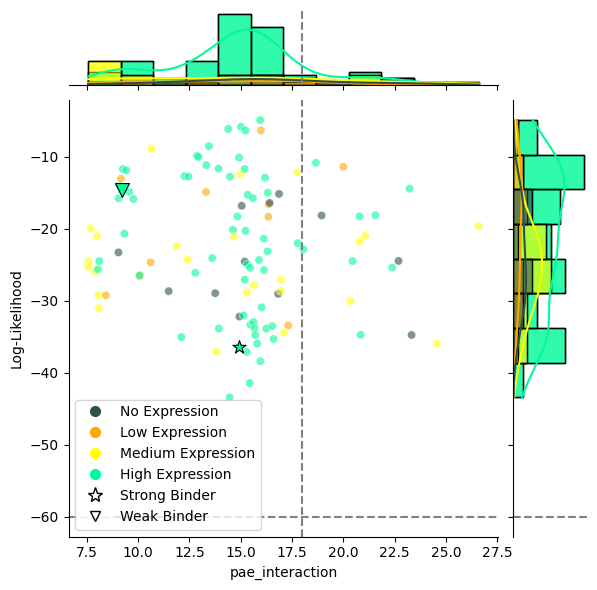

In [23]:
seq_length_mask = round1_table[round1_table['Seq_Length'] <= 100]

custom_palette = {0:'darkslategrey',1:'orange',2:'yellow',3:'mediumspringgreen'}
g = sns.JointGrid(data=seq_length_mask, x="pae_interaction", y="Log-Likelihood", hue="EXPRESSION #", palette=custom_palette)
g.plot(sns.scatterplot, sns.histplot, alpha=.6)
g.plot_marginals(sns.histplot, kde=True)
g.refline(x=18, y=-60)
true_mask = seq_length_mask[(seq_length_mask['BINDING?'] == 'TRUE')]
sns.scatterplot(data= true_mask, x='pae_interaction', y='Log-Likelihood', s=100, hue="EXPRESSION #", palette=custom_palette, marker='*', edgecolor='black', ax=g.ax_joint)
weak_mask = seq_length_mask[(seq_length_mask['BINDING?'] == 'Weak')]
sns.scatterplot(data= weak_mask, x='pae_interaction', y='Log-Likelihood', s=100,hue="EXPRESSION #", palette=custom_palette, marker='v',edgecolor='black', ax=g.ax_joint)


none = mlines.Line2D([], [], color='darkslategrey', marker='o', linestyle='None', markersize=7, label='No Expression')
low = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=7, label='Low Expression')
medium = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None', markersize=7, label='Medium Expression')
high = mlines.Line2D([], [], color='mediumspringgreen', marker='o', linestyle='None', markersize=7, label='High Expression')
strong_binder = mlines.Line2D([], [], color='white', marker='*', linestyle='solid', markeredgecolor='black', markersize=11, label='Strong Binder')
weak_binder = mlines.Line2D([], [], color='white', marker='v', linestyle='solid', markeredgecolor='black', markersize=7, label='Weak Binder')

g.ax_joint.legend(handles=[none, low, medium, high, strong_binder, weak_binder], loc='lower left')

# Sequence Length vs iPAE

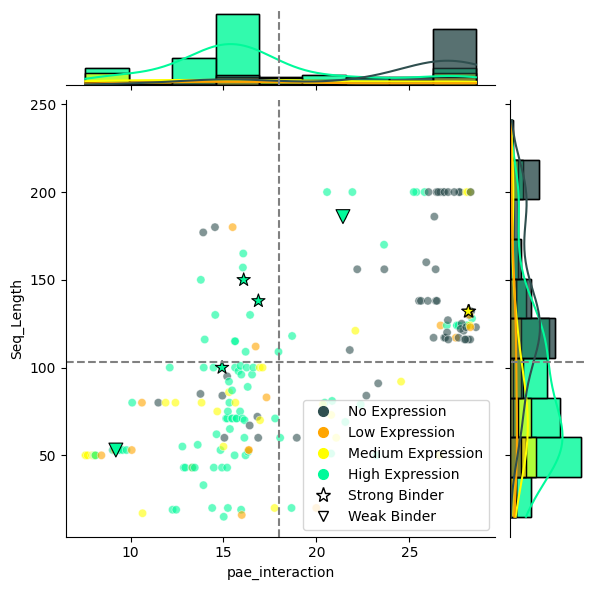

In [33]:

custom_palette = {0:'darkslategrey',1:'orange',2:'yellow',3:'mediumspringgreen'}
g = sns.JointGrid(data=round1_table, x="pae_interaction", y="Seq_Length", hue="EXPRESSION #", palette=custom_palette)
g.plot(sns.scatterplot, sns.histplot, alpha=.6)
g.plot_marginals(sns.histplot, kde=True)
g.refline(x=18, y=103)
true_mask = round1_table[(round1_table['BINDING?'] == 'TRUE')]
sns.scatterplot(data= true_mask, x='pae_interaction', y='Seq_Length', s=100, hue="EXPRESSION #", palette=custom_palette, marker='*', edgecolor='black', ax=g.ax_joint)
weak_mask = round1_table[(round1_table['BINDING?'] == 'Weak')]
sns.scatterplot(data= weak_mask, x='pae_interaction', y='Seq_Length', s=100,hue="EXPRESSION #", palette=custom_palette, marker='v',edgecolor='black', ax=g.ax_joint)


none = mlines.Line2D([], [], color='darkslategrey', marker='o', linestyle='None', markersize=7, label='No Expression')
low = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', markersize=7, label='Low Expression')
medium = mlines.Line2D([], [], color='yellow', marker='o', linestyle='None', markersize=7, label='Medium Expression')
high = mlines.Line2D([], [], color='mediumspringgreen', marker='o', linestyle='None', markersize=7, label='High Expression')
strong_binder = mlines.Line2D([], [], color='white', marker='*', linestyle='solid', markeredgecolor='black', markersize=11, label='Strong Binder')
weak_binder = mlines.Line2D([], [], color='white', marker='v', linestyle='solid', markeredgecolor='black', markersize=7, label='Weak Binder')

g.ax_joint.legend(handles=[none, low, medium, high, strong_binder, weak_binder], loc='lower right')
# g.savefig("iPAE-seqLENGTH.png", dpi=600)